In [1]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as sco

### 1. Regularized Linear Regression

### Visualizing the dataset

Text(0.5, 0, 'Change in Water level')

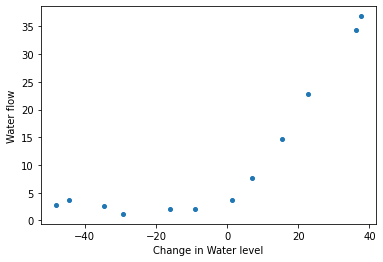

In [2]:
dataset = loadmat('ex5data1.mat')
X = dataset['X']
y = dataset['y']
plt.plot(X,y, ls='', markersize=4, marker='o')
plt.ylabel("Water flow")
plt.xlabel("Change in Water level")

### Regularized linear regression cost function

In [113]:
def JReg(theta, X, y, lam):
    j1 = np.dot(X,theta)-y[:,0] # Theta a 1D array. If not, np.dot will be matrix product
    j1 = np.dot(j1,j1)
    j2 = lam*np.dot(theta[1:],theta[1:]) 
    j = j1 + j2
    j /= 2*y.shape[0]
    return j

In [4]:
X_ext = np.hstack((np.ones((X.shape[0],1)), X))
theta = np.ones((2))
JReg(theta,X_ext,y,1)

303.9931922202643

### Regularized linear regression gradient

In [5]:
def gradReg(theta, X, y, lam):
    tt = np.zeros_like(theta)
    tt[1:] = theta[1:]
    # For some reason this leads to a poor minimization...
    #lam_greg = theta.copy()
    #lam_greg[0]=0
    g1 = np.dot(X,theta)-y[:,0] 
    g = np.dot(g1,X) + lam*tt
    return g/y.shape[0]

In [6]:
X_ext = np.hstack((np.ones((X.shape[0],1)), X))
theta = np.ones((2))
gradReg(theta,X_ext,y,1)

array([-15.30301567, 598.25074417])

###  Fitting linear regression

In [56]:
def fit(X_ext, y, lam):
    mini = sco.minimize(JReg, x0=np.zeros(X_ext.shape[1]), args=(X_ext,y,lam), method='CG', jac=gradReg)
    return mini

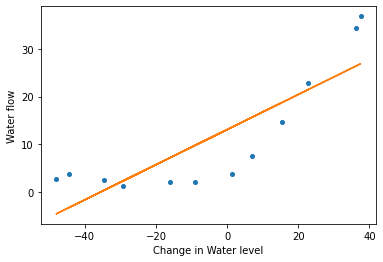

In [57]:
th = fit(X_ext,y,0).x
dataset = loadmat('ex5data1.mat')
X = dataset['X']
y = dataset['y']
plt.plot(X,y, ls='', markersize=4, marker='o')
plt.ylabel("Water flow")
plt.xlabel("Change in Water level")
plt.plot(X,np.dot(X_ext,th_fit))

### 2. Bias-variance

In [68]:
def error(X,y, X_val, y_val, lam):
    et, ev = np.zeros(y.shape[0]), np.zeros(y.shape[0])
    for i in range(y.shape[0]):
        X_train = X[:i+1,:]
        y_train = y[:i+1,:]
        
        th_fit = fit(X_train,y_train,lam).x
        
        et[i] = JReg(th_fit, X_train, y_train, 0)
        h = np.dot(X[:i + 1], th_fit) - y[:i + 1,0]
        ev[i] = JReg(th_fit, X_val, y_val, 0)    
    return et, ev

In [59]:
X_val = dataset["Xval"]
X_val_ext = np.hstack((np.ones((X_val.shape[0],1)), X_val))
y_val = dataset["yval"]
et, ev = error(X_ext, y, X_val_ext, y_val)
et[:5], ev[:5]

(array([3.94430453e-31, 2.85962078e-30, 3.28659505e+00, 2.84267769e+00,
        1.31540488e+01]),
 array([205.12109575, 110.30036611,  45.01023181,  48.36891137,
         35.86514112]))

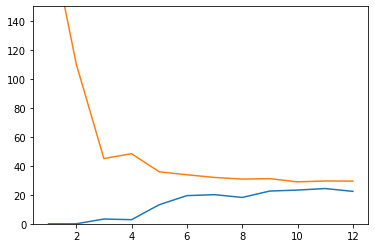

In [60]:
plt.plot(np.arange(y.shape[0])+1, et)
plt.plot(np.arange(y.shape[0])+1, ev)
plt.ylim(0,150);

### 3. Polynomial regression

In [61]:
def poly(X,p):
    X_ext = np.zeros((X.shape[0],p))
    for i in range(p):
        X_ext[:,i] = X.ravel()**(i+1)
    return X_ext

def norm(arr):
    mu = np.mean(arr, axis=0)
    std = np.std(arr, ddof=1, axis=0)
    return mu, std, (arr - mu)/std

In [62]:
X_poly = poly(X, 8)
mu, std, X_poly = norm(X_poly)
X_poly_ext = np.hstack((np.ones((X_poly.shape[0],1)), X_poly))

X_poly_val = poly(X_val, 8)
X_poly_val = (X_poly_val - mu) / std
X_poly_val_ext = np.hstack((np.ones((X_poly_val.shape[0], 1)), X_poly_val))
X_poly_val_ext.shape, X_poly_ext.shape

((21, 9), (12, 9))

In [76]:
et, ev = error(X_poly_ext, y, X_poly_val_ext, y_val, 0)
et[:5], ev[:5]

(array([0.00000000e+00, 8.38164712e-31, 1.91978245e-11, 4.52866261e-20,
        5.11950187e-09]),
 array([160.72189969, 160.12151033,  61.75500548,  61.9288954 ,
          6.59987722]))

### Learning Polynomial Regression

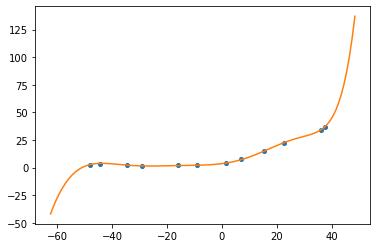

In [77]:
th_fit_poly = fit(X_poly_ext, y, 0).x

X_plot = np.arange(X.min()*1.3, X.max()*1.3, 1)[:, np.newaxis]
X_plot_poly = poly(X_plot, 8)
X_plot_poly = (X_plot_poly-mu)/std
X_plot_poly_ext = np.hstack((np.ones((X_plot_poly.shape[0],1)), X_plot_poly))

plt.plot(X,y, ls='', markersize=4, marker='o')
plt.plot(X_plot, np.dot(X_plot_poly_ext, th_fit_poly))
# Not the same fit that Andrew obtains...

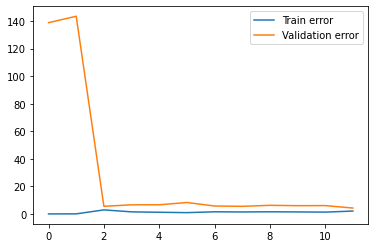

In [107]:
plt.plot(et, label='Train error')
plt.plot(ev, label='Validation error')
plt.legend()

### Adjusting the regularization parameter

**$\lambda$=1**

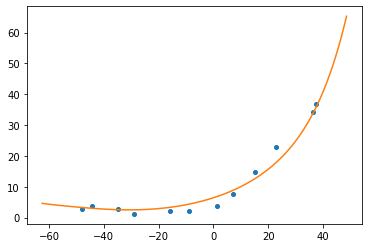

In [84]:
th_fit_poly = fit(X_poly_ext, y, 1).x

X_plot = np.arange(X.min()*1.3, X.max()*1.3, 1)[:, np.newaxis]
X_plot_poly = poly(X_plot, 8)
X_plot_poly = (X_plot_poly-mu)/std
X_plot_poly_ext = np.hstack((np.ones((X_plot_poly.shape[0],1)), X_plot_poly))

plt.plot(X,y, ls='', markersize=4, marker='o')
plt.plot(X_plot, np.dot(X_plot_poly_ext, th_fit_poly))
# Not the same fit that Andrew obtains...

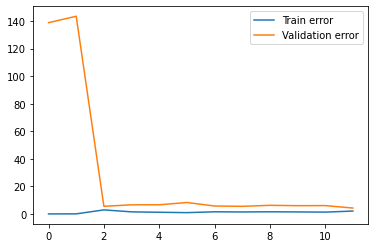

In [106]:
et, ev = error(X_poly_ext, y, X_poly_val_ext, y_val, 1)

plt.plot(et, label='Train error')
plt.plot(ev, label='Validation error')
plt.legend()

**$\lambda$=100**

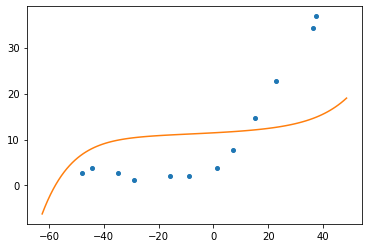

In [86]:
th_fit_poly = fit(X_poly_ext, y, 100).x

X_plot = np.arange(X.min()*1.3, X.max()*1.3, 1)[:, np.newaxis]
X_plot_poly = poly(X_plot, 8)
X_plot_poly = (X_plot_poly-mu)/std
X_plot_poly_ext = np.hstack((np.ones((X_plot_poly.shape[0],1)), X_plot_poly))

plt.plot(X,y, ls='', markersize=4, marker='o')
plt.plot(X_plot, np.dot(X_plot_poly_ext, th_fit_poly))
# Not the same fit that Andrew obtains...

### Selecting λ using a cross validation set

In [103]:
l_test = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
ets, evs = [], []
for l in l_test:
    et, ev = error(X_poly_ext, y, X_poly_val_ext, y_val, l)
    ets.append(et[-1])
    evs.append(ev[-1])

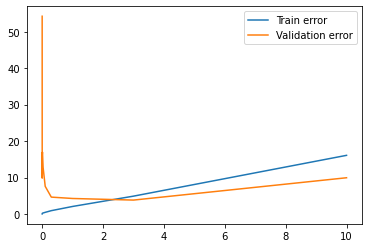

In [109]:
plt.plot(l_test, ets, label="Train error")
plt.plot(l_test, evs, label="Validation error")
plt.legend()

### Computing test set error

In [118]:
X_test = dataset["Xtest"]
y_test = dataset["ytest"]

lam = 3

X_poly = poly(X, 8)
mu, std, X_poly = norm(X_poly)
X_poly_ext = np.hstack((np.ones((X_poly.shape[0],1)), X_poly))

X_poly_test = poly(X_test, 8)
X_poly_test = (X_poly_test - mu) / std
X_poly_test_ext = np.hstack((np.ones((X_poly_test.shape[0], 1)), X_poly_test))
X_poly_test_ext.shape, X_poly_ext.shape

((21, 9), (12, 9))

In [120]:
th3 = fit(X_poly_ext, y, lam).x
JReg(th3, X_poly_test_ext,y_test,0)

3.8598878209718515